# Statsmodels Notebook
This notebook demonstrates end-to-end Bitcoin time series forecasting using statsmodels' ARIMA, along with visualization, ACF/PACF analysis, and data storage. It uses utility functions defined in `statsmodels_utils.py` for modular and reusable logic.

References:
- statsmodels Documentation: https://www.statsmodels.org/
- statsmodels.API.md` for API details.
- CoinGecko API Documentation: https://www.coingecko.com/en/api/documentation
- Jupyter Notebook Style Guide: https://github.com/causify-ai/helpers/blob/master/docs/coding/all.jupyter_notebook.how_to_guide.md.md

In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import logging
import Statsmodels_utils as smu  
import warnings
warnings.filterwarnings("ignore")

# Set up basic logging configuration
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

## Load and simulate 1-day + 3-minute real-time BTC data

In [51]:
btc_df = smu.fetch_historical_data()
btc_df = smu.simulate_realtime(btc_df, minutes=3)

INFO:Statsmodels_utils:Simulating 3 minutes of real-time price updates...
INFO:Statsmodels_utils:[2025-05-02 02:32:47.631441+00:00] Appended price: $96987
INFO:Statsmodels_utils:[2025-05-02 02:33:47.764766+00:00] Appended price: $96991
INFO:Statsmodels_utils:[2025-05-02 02:34:47.873455+00:00] Appended price: $96993


## Plot the Time Series


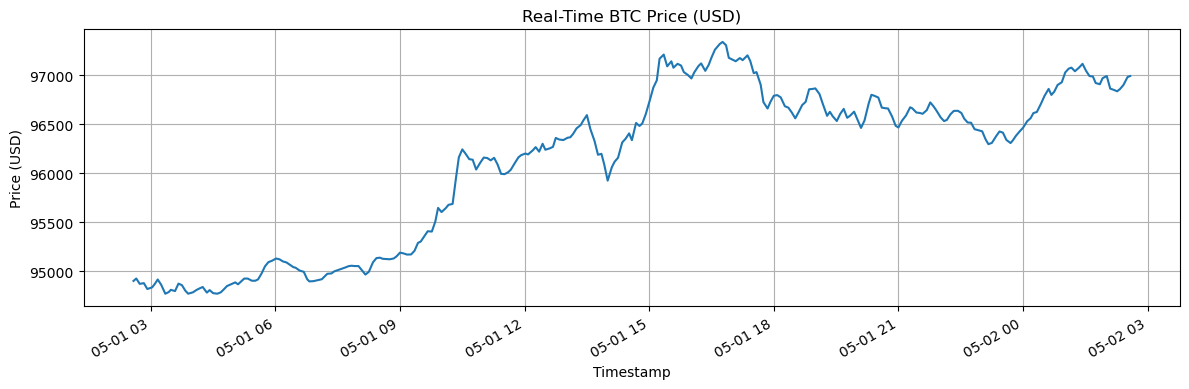

In [59]:
smu.plot_time_series(btc_df)

## Autocorrelation Analysis

<Figure size 1000x400 with 0 Axes>

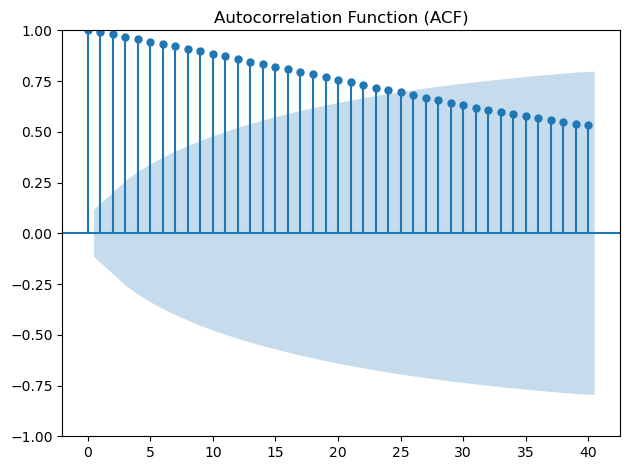

<Figure size 1000x400 with 0 Axes>

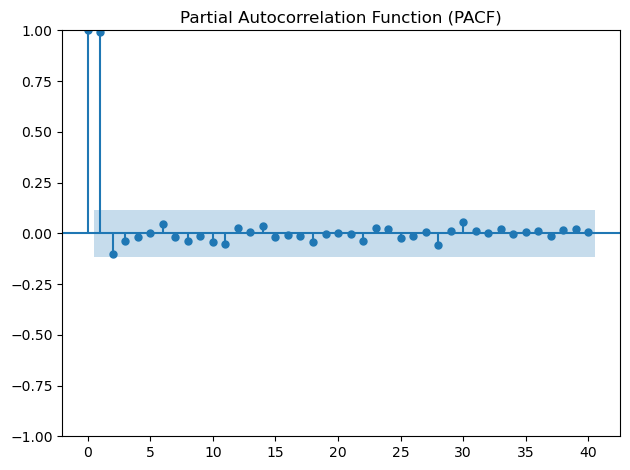

In [52]:
smu.plot_acf_pacf(btc_df)

## Fit ARIMA Model and Forecast 30 Minutes Ahead

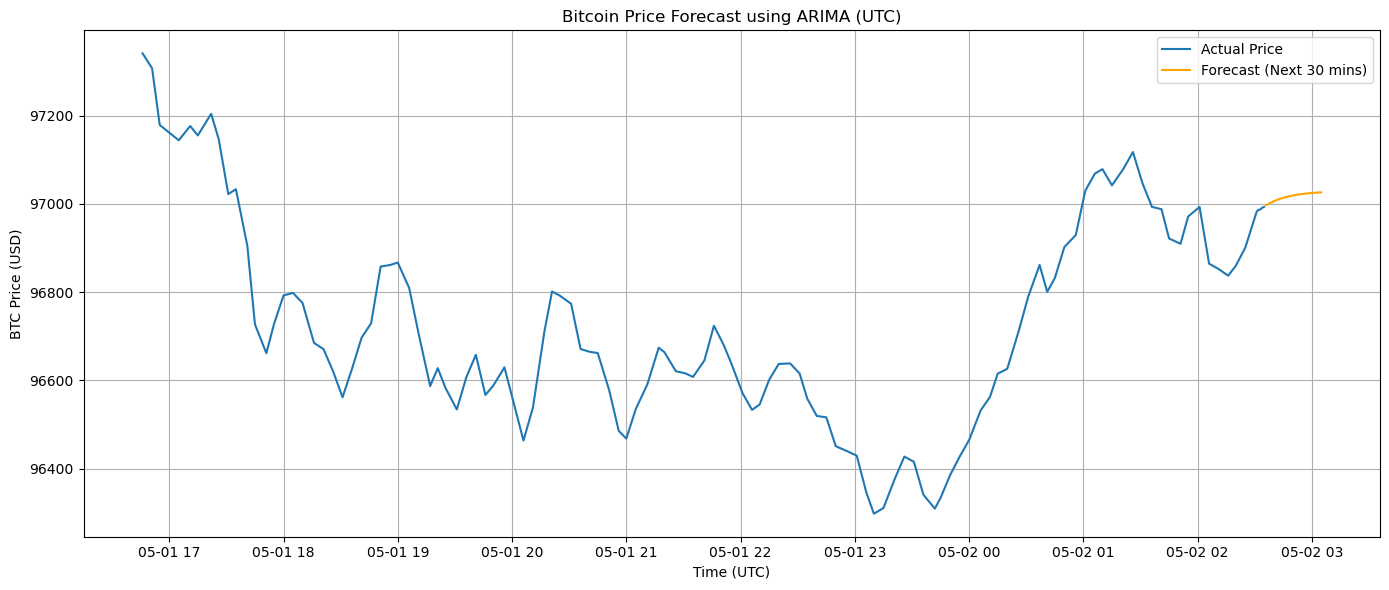

In [64]:
model_results, forecast = smu.run_arima_analysis(btc_df)
smu.plot_forecast(btc_df, forecast)

## Save Results to CSV

In [66]:
smu.save_to_csv(btc_df, forecast)

INFO:Statsmodels_utils:Data saved to 'btc_full_data.csv' and 'btc_price_forecast.csv'.


## Compare Historical BTC Prices at Different Time Scales

INFO:Statsmodels_utils:Saved data for Last 1 Day to btc_1day.csv


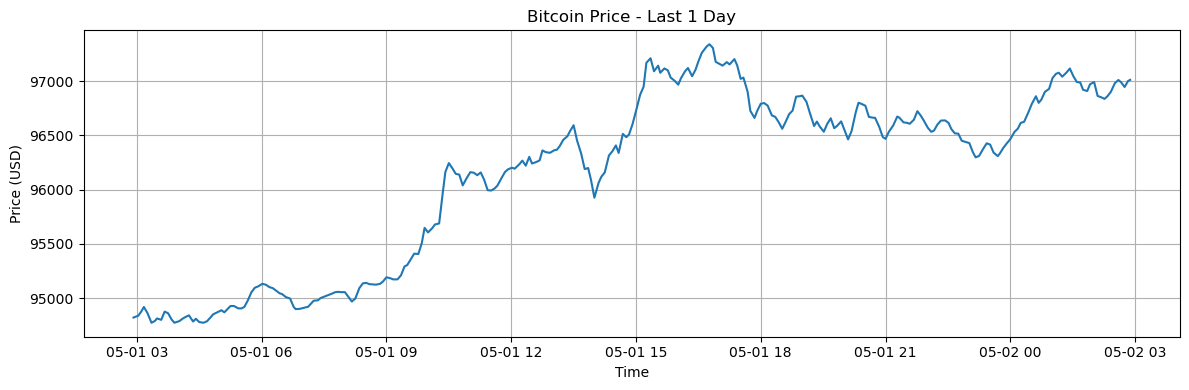

INFO:Statsmodels_utils:Saved data for Last 30 Days to btc_30days.csv


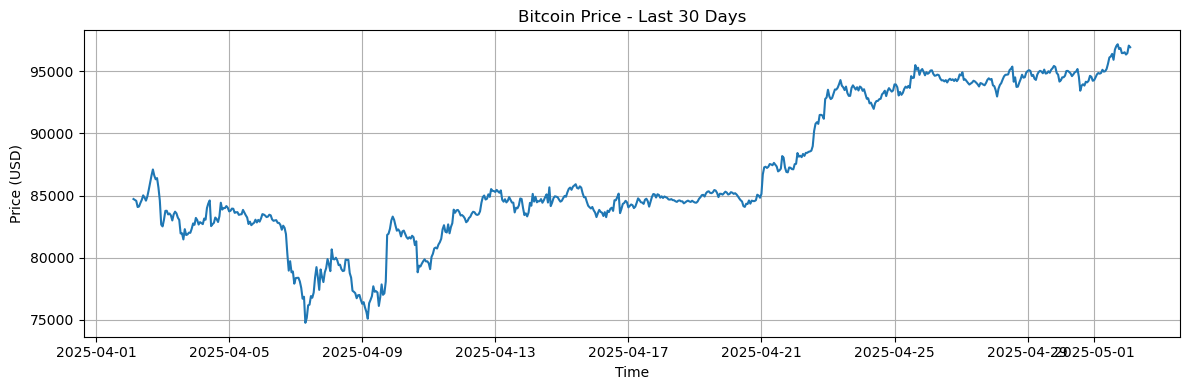

INFO:Statsmodels_utils:Saved data for Last 1 Year to btc_1year.csv


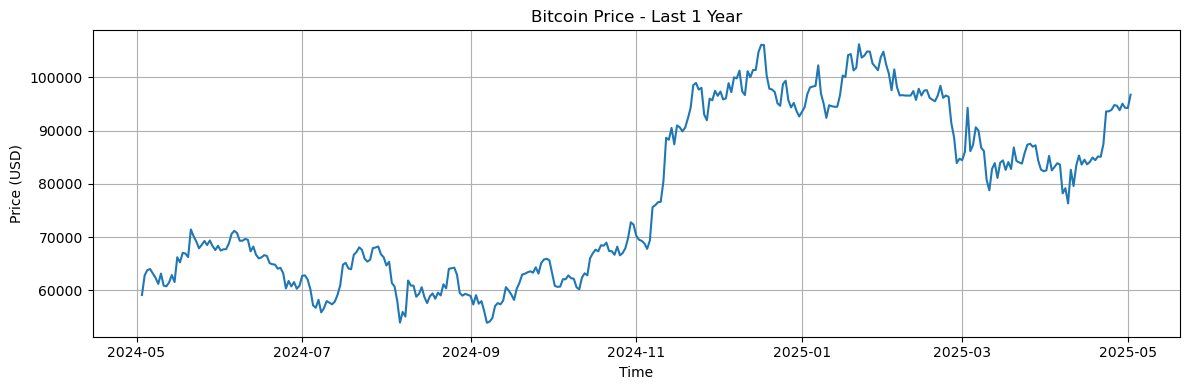

In [68]:
btc_1d = smu.fetch_and_process_data(1, "btc_1day.csv", "Last 1 Day")
btc_30d = smu.fetch_and_process_data(30, "btc_30days.csv", "Last 30 Days")
btc_1y = smu.fetch_and_process_data(365, "btc_1year.csv", "Last 1 Year")